In [3803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3804]:
path='C:\\Users\\amanc\\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\train.csv'
# dtype={'Age':'int64',
#        'Annual_Income':'float64', 'Monthly_Inhand_Salary':'float64', 'Num_Bank_Accounts':'int64',
#        'Num_Credit_Card':'int64', 'Interest_Rate':'float64', 'Num_of_Loan':'int64',
#        'Delay_from_due_date':'int64', 'Num_of_Delayed_Payment':'int64', 'Changed_Credit_Limit':'float64',
#        'Num_Credit_Inquiries':'int64', 'Outstanding_Debt':'float64',
#        'Credit_Utilization_Ratio':'float64',
#        'Payment_of_Min_Amount':'category', 'Total_EMI_per_month':'float64',
#        'Amount_invested_monthly':'float64', 'Monthly_Balance':'float64'
#        }
data=pd.read_csv(path, low_memory=False)


In [3805]:
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3806]:
data.shape

(100000, 28)

In [3807]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [3808]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [3809]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [3810]:
data['Customer_ID'].duplicated().sum()
#shows that one person has multiple data 

87500

In [3811]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [3812]:
data.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [3813]:
age1=data['Age'].unique()
for i in age1:
    print(i)

23
-500
28_
28
34
54
55
21
31
33
34_
7580
30
30_
24
24_
44
45
40
41
32
33_
35
35_
36
39
37
181
20
46
26
42
19
31_
48
995
40_
37_
38
54_
5079
43
21_
22
6409
16
7080
18
849
3885
20_
15
27
43_
38_
25
3052
14
5342
17
18_
4431
2657
2111_
46_
47
1032
16_
19_
47_
456
5717
53_
53
56
25_
27_
55_
3169
1191
29
42_
7140
48_
49
49_
8233
6955
2534
3115
7657
51
50
5112
50_
32_
6452
2744
22_
17_
1439
29_
5795
4872
1772
15_
1383
5657
52
1934
51_
8352
3734
26_
2056
39_
7508
2339
14_
8406
1424
36_
6953
5626
4471
548
44_
769
5490
525
4202
3665
7670_
4670
3616
6922
6619
1808
7992
45_
223
1232
4659
6895
395
7099
6048
3936
3512
123
5639
471
7359
23_
4049
5053
2109
7183
5604
1206
6835
4067
41_
1812
1170
3625
6354
3724
480
5610
4710
4351
52_
5784
3937
3542
2239
5645
7425
7851
2027
6306
835
3513
6846
6868
7805
7274
831
8394
2751
733_
783
2455
5612
2402
4119
4645
8105
1400
7431
3666
2350
491
1116
692
5429
4745
4017
3279
651
5611
5769_
6586
7699
919
6765
5376
2546
112
3909
5054
8655
4383_
2824
56_
7865
2823
6365


In [3814]:
data['Age']=data['Age'].str.replace('_','')
data['Age']=data['Age'].str.replace('-','')
data['Age'] = [int(x) for x in data['Age']]


In [3815]:
data['Age'].dtype

dtype('int64')

In [3816]:
# for index in range(len(data)):
    #     current_customer_id = data.loc[index, 'Customer_ID']
        
    #     # Initialize next and previous customer IDs
    #     next_customer_id = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
    #     previous_customer_id = data.loc[index - 1, 'Customer_ID'] if index > 0 else None
        
    #     # First check
    #     if data.loc[index, 'Age'] > 56:
    #         if previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']
    #         elif next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']

    #     # Second check (Reverse Order)
    #     if data.loc[index, 'Age'] > 56:
    #         if next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']
    #         elif previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']


In [3817]:
def fill_values(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] > threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [3818]:
def fill_values2(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] == threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] == threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [3819]:
for i in range(2):
    data = fill_values('Age', data, 56)
    

In [3820]:
age2=data['Age'].unique()
for i in age2:
    print(i)

23
28
34
54
55
21
31
33
30
24
44
45
40
41
32
35
36
39
37
20
46
26
42
19
48
38
43
22
16
18
15
27
25
14
17
47
53
56
29
49
51
50
52


In [3821]:
data['SSN']=data['SSN'].str.replace('-','')
data['SSN']=data['SSN'].str.replace('#F%$D@*&8','1')  # #F%$D@*&8 is value in SSN which is replace by 1 so that all col. can be converted into integer
data['SSN'] = [int(x) for x in data['SSN']]

In [3822]:
for i in range(3):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, 'SSN'] == 1:
            if next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            

        # Second check (Reverse Order)
        
        if data.loc[index, 'SSN'] == 1:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            elif next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']




In [3823]:
#data=fill_values2('SSN',data,1)

In [3824]:
data[data['SSN']==1]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3825]:
data['Occupation'].unique()


array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [3826]:
data['Occupation']=data['Occupation'].str.replace('_______','None')

In [3827]:
for i in range(3):
    data = fill_values2('Occupation', data,'None')

In [3828]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [3829]:

data['Annual_Income']=data['Annual_Income'].str.replace('_','')

data['Annual_Income']=[float(x) for x in data['Annual_Income']]
data['Annual_Income']=data['Annual_Income'].apply(lambda x: f"{x:.2f}")
data['Annual_Income']=[float(x) for x in data['Annual_Income']]

In [3830]:
data['Monthly_Inhand_Salary'].isnull().sum()

15002

In [3831]:

data['Monthly_Inhand_Salary'].fillna(0,inplace=True)
data['Monthly_Inhand_Salary']=data['Monthly_Inhand_Salary'].apply(lambda x: f"{x:.2f}")
data['Monthly_Inhand_Salary']=[str(x) for x in data['Monthly_Inhand_Salary']] #changing into str because cannot fill values on float datatype

C:\Users\amanc\AppData\Local\Temp\ipykernel_6044\2251128497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Monthly_Inhand_Salary'].fillna(0,inplace=True)


In [3832]:
for i in range(5):
    data=fill_values2('Monthly_Inhand_Salary',data,'0.00')
# for index in range(len(data)):
#     current_value=data.loc[index,'Customer_ID']

#     next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
#     previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
    
#     # First check
#     if data.loc[index,'Monthly_Inhand_Salary'] == '0.00':

#         if previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
#         elif next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
        
    
#     # Second check (Reverse Order)
#     if data.loc[index,'Monthly_Inhand_Salary']== '0.00':
#         if next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
#         elif previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
        
        

In [3833]:
data['Monthly_Inhand_Salary']=[float(x) for x in data['Monthly_Inhand_Salary']] 

In [3834]:
data[data['Monthly_Inhand_Salary']=='0.00']
   #


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3835]:
#data.to_csv('output.csv')


In [3836]:
data['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

In [3837]:
data['Num_Bank_Accounts']=data['Num_Bank_Accounts'].replace(-1,20)

In [3838]:
for i in range(2):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
        
        # First check

        if data.loc[index,'Num_Bank_Accounts']>10:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
        
        # Second check (Reverse Order)
        if data.loc[index,'Num_Bank_Accounts'] > 10:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
        
        

In [3839]:
data['Num_Bank_Accounts'].unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10], dtype=int64)

<Axes: ylabel='count'>

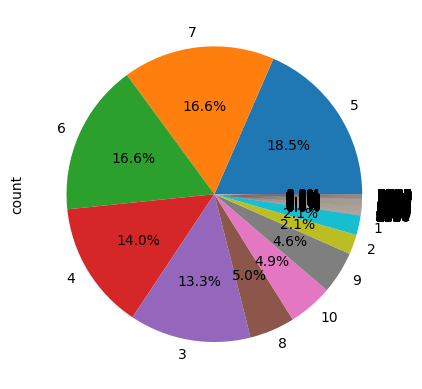

In [3840]:
data['Num_Credit_Card'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [3841]:
# card=data['Num_Credit_Card'].unique()
# for i in np.sort(card):
#     print(i)
for index,value in enumerate(data['Num_Credit_Card'].value_counts()):
    print(index,value)

0 18459
1 16615
2 16559
3 14030
4 13277
5 4956
6 4860
7 4643
8 2149
9 2132
10 36
11 13
12 8
13 7
14 6
15 6
16 6
17 6
18 6
19 6
20 6
21 6
22 5
23 5
24 5
25 5
26 5
27 5
28 5
29 5
30 5
31 5
32 5
33 5
34 5
35 5
36 5
37 5
38 5
39 5
40 5
41 5
42 5
43 5
44 4
45 4
46 4
47 4
48 4
49 4
50 4
51 4
52 4
53 4
54 4
55 4
56 4
57 4
58 4
59 4
60 4
61 4
62 4
63 4
64 4
65 4
66 4
67 4
68 4
69 4
70 4
71 4
72 4
73 4
74 4
75 4
76 4
77 4
78 4
79 4
80 4
81 4
82 4
83 4
84 4
85 4
86 4
87 4
88 4
89 4
90 4
91 4
92 4
93 4
94 4
95 4
96 4
97 4
98 4
99 4
100 4
101 4
102 4
103 4
104 4
105 4
106 4
107 4
108 4
109 4
110 4
111 4
112 4
113 3
114 3
115 3
116 3
117 3
118 3
119 3
120 3
121 3
122 3
123 3
124 3
125 3
126 3
127 3
128 3
129 3
130 3
131 3
132 3
133 3
134 3
135 3
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 3
144 3
145 3
146 3
147 3
148 3
149 3
150 3
151 3
152 3
153 3
154 3
155 3
156 3
157 3
158 3
159 3
160 3
161 3
162 3
163 3
164 3
165 3
166 3
167 3
168 3
169 3
170 3
171 3
172 3
173 3
174 3
175 3
176 3
177 3
178 3

In [3842]:
for i in range(2):
    data = fill_values('Num_Credit_Card', data, 9)


In [3843]:
# for i in range(2):
#     for index in range(len(data)):
#         current_value=data.loc[index,'Customer_ID']

#         next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
#         previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
        
#         # First check
#         if data.loc[index,'Num_Credit_Card'] > 10:
#             if previous_value is not None and current_value == previous_value:
#                 data.loc[index,'Num_Credit_Card'] = data.loc[index-1,'Num_Credit_Card']
#             elif next_value is not None and current_value == next_value:
#                 data.loc[index,'Num_Credit_Card'] = data.loc[index+1,'Num_Credit_Card']
        
#         # Second check (Reverse Order)
#         if data.loc[index,'Num_Credit_Card']>10:
#                 if next_value is not None and current_value == next_value:
#                     data.loc[index,'Num_Credit_Card'] = data.loc[index+1,'Num_Credit_Card']
#                 elif previous_value is not None and current_value == previous_value:
#                     data.loc[index,'Num_Credit_Card'] = data.loc[index-1,'Num_Credit_Card']

In [3844]:
a=data['Interest_Rate'].unique()
for i in np.sort(a):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
59
60
64
67
73
74
75
76
77
81
87
89
91
92
94
95
98
99
100
101
102
106
107
108
113
115
120
128
136
137
140
142
144
146
151
159
160
162
170
174
177
186
197
200
203
206
207
208
213
215
219
224
232
238
243
246
247
249
259
260
261
262
265
268
271
274
279
281
284
286
288
289
290
291
295
296
297
299
306
312
316
318
323
326
328
330
332
334
343
348
355
356
360
362
363
369
370
373
375
377
378
381
382
387
388
390
391
393
401
404
405
406
407
410
411
413
417
418
419
422
426
430
433
438
440
441
443
447
448
450
453
454
455
457
459
464
465
468
470
471
472
473
482
493
494
495
498
501
504
511
519
520
524
525
527
531
533
536
552
554
556
561
563
567
570
572
577
581
583
584
591
596
601
608
609
610
612
613
620
623
624
629
634
639
642
648
652
661
668
671
672
674
679
682
684
689
690
692
696
702
707
710
713
716
718
720
726
729
731
732
733
736
738
739
748
749
750
751
753
754
757
758
774
778
780
781
792
794
795
797
799
8

In [3845]:
for i in range(6):
    data=fill_values('Interest_Rate',data,34)


In [3846]:
data[data['Interest_Rate']>34]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3847]:
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('-','') #data contain -100 and 0_ or _2
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('_','')
data['Num_of_Loan']=[int(x) for x in data['Num_of_Loan']] #converting into integer

In [3848]:
data['Num_of_Loan'].sample(10)

48205      2
11093    100
67154      5
62201      0
85140      1
88746      4
52947    100
6560       3
73775      4
16079      3
Name: Num_of_Loan, dtype: int64

In [3849]:
for i in range(3):
    data=fill_values('Num_of_Loan',data,9)

In [3850]:
data[data['Num_of_Loan']>9]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3851]:
data['Type_of_Loan'].isna().sum()

11408

In [3852]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Type_of_Loan']='No Loan'



In [3853]:
data['Delay_from_due_date'].unique() #contain -ve values let's fill it w.r.t. customer id

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [3854]:
for i in range(8):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
            
        # First check
        if data.loc[index,'Delay_from_due_date'] <0 or data.loc[index,'Delay_from_due_date'] >24:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
            
        # Second check (Reverse Order)
        if data.loc[index,'Delay_from_due_date']<0 or data.loc[index,'Delay_from_due_date'] >24:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']

In [3855]:
data['Delay_from_due_date'].unique()

array([ 3,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 14,  2, 16,
       17, 15, 23, 22, 21, 18, 19, 53, 26, 48, 20, 24, 52, 25, 61, 31, 28,
       49, 27, 57, 62, 54, 50, 41, 55, 36, 46, 60, 33, 29, 44, 34, 38, 45,
       56, 42, 47, 59, 40, 35, 32, 51, 39, 37, 43, 64, 58, 65, 67, 63, 66],
      dtype=int64)

In [3856]:
data['Num_of_Delayed_Payment'].isnull().sum()

7002

In [3857]:
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].str.replace('_','')
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].ffill()
data['Num_of_Delayed_Payment']=[int(i)for i in data['Num_of_Delayed_Payment']]

In [3858]:
for i in np.sort(data['Num_of_Delayed_Payment'].unique()):
    print(i)

-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
46
47
49
52
72
80
84
85
86
88
94
98
102
106
107
121
130
132
133
142
145
162
166
175
182
183
186
192
195
196
197
210
211
217
221
223
238
252
264
265
271
273
281
283
290
294
306
309
320
328
337
351
359
371
372
384
398
399
411
415
416
426
430
439
441
450
468
473
482
497
508
519
523
529
531
532
538
541
544
559
577
583
585
594
602
615
640
642
659
662
663
666
674
676
683
693
700
707
708
709
714
719
733
739
742
749
754
758
775
778
779
787
793
800
804
808
809
813
819
823
827
829
834
845
846
847
848
851
853
867
871
876
887
904
905
921
923
926
929
933
938
960
969
972
974
996
1004
1014
1015
1018
1034
1045
1049
1060
1061
1063
1073
1079
1086
1087
1096
1106
1133
1150
1154
1164
1172
1177
1178
1180
1181
1184
1191
1192
1199
1204
1211
1215
1216
1218
1222
1236
1243
1256
1263
1278
1282
1295
1301
1323
1325
1328
1329
1332
1337
1338
1354
1359
1370
1371
1389
1392
1402
1411
1422
1443
1450
1463
1471
1473
1478
1480
1481
1489
14

In [3859]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Delayed_Payment'] <0:
        data.loc[index,'Num_of_Delayed_Payment']=400

In [3860]:
for i in range(4):
    data=fill_values('Num_of_Delayed_Payment',data,24)
    

In [3861]:

print('datatype is ',data['Changed_Credit_Limit'].dtype)
print('total null values are',data['Changed_Credit_Limit'].isnull().sum())
for i in data['Changed_Credit_Limit'].unique():
    print(i)


datatype is  object
total null values are 0
11.27
_
6.27
9.27
5.42
7.42
6.42
7.1
11.1
9.1
1.99
-2.01
-1.01
-3.01
2.58
10.14
9.14
9.34
15.34
8.34
11.34
17.13
21.13
18.13
8.24
11.24
5.76
-1.2400000000000002
1.7599999999999998
11.0
8.0
3.51
5.54
4.54
0.54
11.54
8.86
7.83
10.83
6.28
10.28
9.13
13.13
9.22
8.22
2.2200000000000006
17.92
11.920000000000002
15.920000000000002
13.920000000000002
9.95
15.95
8.95
4.17
8.969999999999997
7.97
10.97
0.86
-4.14
-0.14
15.79
21.79
7.27
10.27
1.13
-2.87
8.129999999999999
17.96
13.96
12.96
8.97
14.97
12.97
4.9700000000000015
4.89
1.54
-2.46
6.83
0.8300000000000001
5.07
6.07
11.8
16.8
16.58
10.579999999999998
23.58
22.58
21.58
9.58
10.44
4.44
26.94
22.94
27.94
2.74
-4.26
-1.2599999999999998
9.24
7.67
5.67
4.67
-1.33
7.58
21.73
13.74
14.74
6.74
9.2
10.2
6.43
27.99
20.99
23.99
8.82
6.82
10.98
9.98
16.25
14.25
10.25
11.94
13.94
19.87
24.87
16.87
17.25
11.25
5.51
12.51
-1.4900000000000002
11.92
12.92
13.92
8.92
15.06
5.79
21.22
14.22
6.81
15.27
9.81
3.81000000

In [3862]:
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].str.replace('_','9999')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].apply(lambda x: f"{x:.2f}")
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [3863]:
data['Changed_Credit_Limit'].dtype


dtype('float64')

In [3864]:
for index in range(len(data)):
    if data.loc[index,'Changed_Credit_Limit'] <0.50:  #0.50 value was used by analyzing data in excel
        data.loc[index,'Changed_Credit_Limit']=9999.0

In [3865]:
def fill_values3(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]


    return data




In [3866]:
for i in range(2):
    data=fill_values('Changed_Credit_Limit',data,29.98)
    data=fill_values3('Changed_Credit_Limit',data,29.98) #29.99 value i found by analyzing data in Excel

In [3867]:
for i in np.sort(data['Changed_Credit_Limit'].unique()):
    print(i)

0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.4
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.88
1.89
1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2.0
2.01
2.02
2.03
2.04
2.05
2.06
2.07
2.08
2.09
2.1
2.11
2.12
2.13
2.14
2.15
2.16
2.17
2.18
2.19
2.2
2.21
2.22
2.23
2.24
2.25
2.26
2.27
2.28
2.29
2.3
2.31
2.32
2.33
2.34
2.35
2.36
2.37
2.38
2.39
2.4
2.41
2.42
2.43
2.44
2.45
2.46
2.47
2.48
2.49
2.5
2.51
2.52
2.53
2

In [3868]:
data['Num_Credit_Inquiries'].isnull().sum()

1965

In [3869]:
data['Num_Credit_Inquiries'].dtype

dtype('float64')

In [3870]:
data['Num_Credit_Inquiries']=data['Num_Credit_Inquiries'].fillna(999.0)

In [3871]:
for i in range(2):
    data=fill_values('Num_Credit_Inquiries',data,16) #16 analyzed in Excel

In [3872]:
print(data['Credit_Mix'].unique())
data['Credit_Mix']=data['Credit_Mix'].str.replace('_','s')

['_' 'Good' 'Standard' 'Bad']


In [3873]:
for i in range(6):
    data=fill_values2('Credit_Mix',data,'s')

In [3874]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [3875]:
data['Outstanding_Debt']=data['Outstanding_Debt'].str.replace('_','')
data['Outstanding_Debt']=data['Outstanding_Debt'].astype(float)

In [3876]:
data['Credit_History_Age'].isnull().sum()

9030

In [3877]:
data['Credit_History_Age']=data['Credit_History_Age'].fillna('abc')

In [3878]:
for i in range(4):
    data=fill_values2('Credit_History_Age',data,'abc')

In [3879]:
data[data['Credit_History_Age']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3880]:
data['Payment_of_Min_Amount'].value_counts()
#NM is the value which we have to update w.r.t. customer_ID

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [3881]:
for i in range(5):
    data=fill_values2('Payment_of_Min_Amount',data,'NM')

print(data['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    59432
No     40568
Name: count, dtype: int64


In [3882]:
data['Total_EMI_per_month'].dtype

dtype('float64')

In [3883]:
for i in range(4):
    data=fill_values('Total_EMI_per_month',data,1000)

In [3884]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Total_EMI_per_month']=0


In [3885]:
data['Total_EMI_per_month']=data['Total_EMI_per_month'].apply(lambda x: f"{x:.2f}")
data['Total_EMI_per_month']=data['Total_EMI_per_month'].astype(float)

In [3886]:
data['Amount_invested_monthly'].isna().sum()

4479

In [3887]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].str.replace('_','')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].fillna('10000')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [3888]:
for i in range(4):
    data=fill_values2('Amount_invested_monthly',data,10000)

In [3889]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].apply(lambda x: f"{x:.2f}")
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [3890]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [3891]:
for i in range(5):
    data=fill_values2('Payment_Behaviour',data,'!@9#%8')

In [3892]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64

In [3893]:
data['Monthly_Balance']=data['Monthly_Balance'].str.replace('__-333333333333333333333333333__','abc')
data['Monthly_Balance']=data['Monthly_Balance'].fillna('abc')

In [3894]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
197,0x1727,CUS_0xa5f9,June,Rickt,34,189095267,Mechanic,57983.12,4720.93,9,...,Bad,3532.83,35.257378,12 Years and 7 Months,Yes,200.43,626.87,Low_spent_Small_value_payments,abc,Standard
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18,397289675,Developer,66567.32,5800.28,5,...,Standard,233.79,33.486848,24 Years and 5 Months,No,100.19,770.70,Low_spent_Small_value_payments,abc,Standard
388,0x1846,CUS_0x9b3c,May,Scheydere,43,224487837,Lawyer,81842.28,6810.19,10,...,Bad,3053.16,31.317433,0 Years and 8 Months,Yes,574.07,447.85,Low_spent_Medium_value_payments,abc,Standard
456,0x18ae,CUS_0x9d78,January,Tim Hepherp,20,423776457,Scientist,69977.60,5978.47,10,...,Bad,3042.36,37.217199,12 Years and 8 Months,Yes,485.75,405.15,Low_spent_Small_value_payments,abc,Standard
457,0x18af,CUS_0x9d78,February,Tim Hepherp,20,423776457,Scientist,69977.60,5978.47,10,...,Bad,3042.36,30.467836,12 Years and 9 Months,Yes,485.75,470.84,Low_spent_Large_value_payments,abc,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99820,0x25ee2,CUS_0x40ad,May,Dorisw,20,715143312,Scientist,65858.48,5421.21,7,...,Standard,2344.57,39.268583,6 Years and 8 Months,Yes,261.20,623.00,Low_spent_Small_value_payments,abc,Standard
99839,0x25efd,CUS_0x8788,August,Sophie Sassardv,25,138387150,Musician,71025.40,5766.78,7,...,Standard,2542.42,25.571911,14 Years and 8 Months,Yes,195.21,694.44,Low_spent_Small_value_payments,abc,Standard
99852,0x25f12,CUS_0x3048,May,Rick Rothackeru,40,375646913,Scientist,81093.16,7017.76,10,...,Bad,4523.30,27.419316,9 Years and 9 Months,Yes,409.04,741.57,Low_spent_Small_value_payments,abc,Standard
99854,0x25f14,CUS_0x3048,July,Rick Rothackeru,40,375646913,Scientist,81093.16,7017.76,10,...,Bad,4523.30,21.098676,9 Years and 11 Months,Yes,409.04,656.55,Low_spent_Medium_value_payments,abc,Poor


In [3897]:
for i in range(3):
    data=fill_values2('Monthly_Balance',data,'abc')



In [3899]:
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)
data['Monthly_Balance']=data['Monthly_Balance'].apply(lambda x: f"{x:.2f}")
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)

In [3902]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [3903]:
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].apply(lambda x: f"{x:.2f}")
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].astype(float)

In [3904]:
data['Credit_Utilization_Ratio']

0        26.82
1        31.94
2        28.61
3        31.38
4        24.80
         ...  
99995    34.66
99996    40.57
99997    41.26
99998    33.64
99999    34.19
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

In [3907]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [3923]:
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None


clean_train = data.groupby(['Customer_ID']).agg({ 
    'Age':'mean',
    'SSN':'first', 
    'Occupation':'first',
    'Annual_Income':'mean',
    'Monthly_Inhand_Salary':'mean',
    'Num_Bank_Accounts':'first',
    'Num_Credit_Card':'first',
    'Interest_Rate':'mean',
    'Num_of_Loan':'first',
    'Type_of_Loan':'first',
    'Delay_from_due_date':'mean',
    'Num_of_Delayed_Payment':'mean',
    'Changed_Credit_Limit':'mean',
    'Num_Credit_Inquiries':'mean', 
    'Credit_Mix':'first',
    'Outstanding_Debt':'mean',
    'Credit_Utilization_Ratio':'mean',
    'Credit_History_Age':'first',
    'Payment_of_Min_Amount':'first',
    'Total_EMI_per_month':'mean',
    'Amount_invested_monthly':'mean',
    'Payment_Behaviour':'first',
    'Monthly_Balance':'mean',
    'Credit_Score':get_mode
    }).reset_index()

In [3924]:
clean_train.head(10)

,Customer_ID,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,17.375,913741218,Lawyer,3.062594e+04,2706.16,6,5,27.0,2,...,Bad,1562.91,33.47750,10 Years and 2 Months,Yes,42.94,158.54875,Low_spent_Large_value_payments,335.37500,Poor
1,CUS_0x1009,25.750,63676938,Mechanic,5.231268e+04,4250.39,6,5,17.0,4,...,Standard,202.68,29.84000,30 Years and 5 Months,Yes,108.37,146.67875,Low_spent_Medium_value_payments,428.74250,Standard
2,CUS_0x100b,18.500,238620395,Media_Manager,1.137814e+05,9549.78,1,4,1.0,0,...,Good,1030.20,34.84250,15 Years and 3 Months,No,0.00,544.44375,Low_spent_Medium_value_payments,781.23125,Poor
3,CUS_0x1011,43.875,793058223,Doctor,5.891847e+04,5208.87,3,3,17.0,3,...,Standard,473.14,27.65625,15 Years and 3 Months,Yes,123.43,281.08250,High_spent_Large_value_payments,332.64250,Standard
4,CUS_0x1013,43.750,930499615,Mechanic,9.862098e+04,7962.42,3,3,6.0,3,...,Good,1233.51,31.93375,17 Years and 3 Months,No,228.02,355.44125,High_spent_Medium_value_payments,472.78125,Standard
5,CUS_0x1015,27.000,810977024,Journalist,4.695102e+04,3725.59,7,4,16.0,0,...,Standard,340.22,35.18125,20 Years and 10 Months,Yes,0.00,267.56875,Low_spent_Medium_value_payments,398.21875,Good
6,CUS_0x1018,15.000,731198119,Accountant,2.193231e+06,5014.57,7,7,23.0,8,...,Bad,2773.09,28.29375,13 Years and 8 Months,Yes,225.37,209.62500,Low_spent_Small_value_payments,333.96250,Poor
7,CUS_0x1026,51.500,500629044,Manager,1.706143e+05,14463.86,2,6,9.0,2,...,Good,849.69,37.18875,20 Years and 1 Months,No,208.91,351.33125,High_spent_Large_value_payments,1170.60625,Standard
8,CUS_0x102d,30.375,692717552,Entrepreneur,8.906452e+04,7256.04,5,3,1.0,1,...,Good,648.36,33.92750,29 Years and 8 Months,No,37.57,384.92000,Low_spent_Medium_value_payments,573.11125,Good
9,CUS_0x102e,25.750,352234930,Scientist,5.080744e+04,4197.95,8,4,11.0,4,...,Standard,869.59,34.27375,22 Years and 4 Months,Yes,88.76,112.06750,High_spent_Large_value_payments,473.96750,Standard


In [3926]:
clean_train.shape

(12500, 25)

In [3925]:
file_path = r'C:\\Users\\amanc\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\clean_train.csv'
data.to_csv(file_path)